In [326]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor

In [327]:
df = pd.read_csv("data/housing.csv")

In [328]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Verify the presence of 'NULL' entries in the dataset

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Removing 'NULL' entries from dataset

In [330]:
df.dropna(inplace=True)

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


# Split data into train and target datasets

In [332]:
X = df.drop(['median_house_value'], axis=1)
Y = df['median_house_value']

In [333]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [334]:
Y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

# Split train data into test and train datasets

In [335]:
X_train, X_test, Y_train, Y_test  = train_test_split(X,Y, test_size=0.2)

In [336]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
15849,-122.44,37.74,52.0,2074.0,366.0,909.0,394.0,4.8382,NEAR BAY
20570,-121.96,38.54,6.0,1485.0,318.0,894.0,308.0,3.2222,INLAND
18531,-122.02,36.98,35.0,1053.0,263.0,552.0,237.0,2.7125,NEAR OCEAN
15264,-117.29,33.05,28.0,1146.0,338.0,672.0,292.0,3.1667,NEAR OCEAN
3392,-118.31,34.28,34.0,3258.0,610.0,1810.0,633.0,5.1145,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6793,-118.14,34.09,28.0,4164.0,1127.0,2934.0,1014.0,2.7483,<1H OCEAN
2000,-119.78,36.74,15.0,1461.0,415.0,924.0,356.0,2.5045,INLAND
10307,-117.82,33.90,25.0,1137.0,170.0,524.0,164.0,7.5744,<1H OCEAN
5442,-118.45,34.00,39.0,1909.0,359.0,867.0,345.0,4.7000,<1H OCEAN


In [337]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
15335,-117.33,33.21,17.0,1246.0,300.0,424.0,288.0,2.2882,NEAR OCEAN
18661,-121.94,36.97,31.0,1738.0,422.0,746.0,355.0,2.5172,NEAR OCEAN
8070,-118.18,33.84,43.0,2561.0,544.0,1063.0,537.0,3.8350,NEAR OCEAN
14402,-117.25,32.79,43.0,906.0,240.0,458.0,205.0,1.8365,NEAR OCEAN
17765,-121.86,37.35,43.0,1536.0,371.0,1256.0,357.0,2.8000,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
19639,-120.80,37.55,18.0,1802.0,335.0,1110.0,329.0,3.1641,INLAND
18617,-122.04,37.04,17.0,4977.0,994.0,1987.0,947.0,3.8854,NEAR OCEAN
7599,-118.25,33.89,36.0,406.0,71.0,268.0,77.0,3.9000,<1H OCEAN
17552,-121.86,37.34,40.0,2277.0,508.0,1718.0,434.0,3.0089,<1H OCEAN


In [338]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


# Preparing data for model

In [339]:
train_data = X_train.join(Y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
15849,-122.44,37.74,52.0,2074.0,366.0,909.0,394.0,4.8382,NEAR BAY,294900.0
20570,-121.96,38.54,6.0,1485.0,318.0,894.0,308.0,3.2222,INLAND,139600.0
18531,-122.02,36.98,35.0,1053.0,263.0,552.0,237.0,2.7125,NEAR OCEAN,217500.0
15264,-117.29,33.05,28.0,1146.0,338.0,672.0,292.0,3.1667,NEAR OCEAN,300000.0
3392,-118.31,34.28,34.0,3258.0,610.0,1810.0,633.0,5.1145,<1H OCEAN,219900.0
...,...,...,...,...,...,...,...,...,...,...
6793,-118.14,34.09,28.0,4164.0,1127.0,2934.0,1014.0,2.7483,<1H OCEAN,218800.0
2000,-119.78,36.74,15.0,1461.0,415.0,924.0,356.0,2.5045,INLAND,90300.0
10307,-117.82,33.90,25.0,1137.0,170.0,524.0,164.0,7.5744,<1H OCEAN,259300.0
5442,-118.45,34.00,39.0,1909.0,359.0,867.0,345.0,4.7000,<1H OCEAN,334700.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

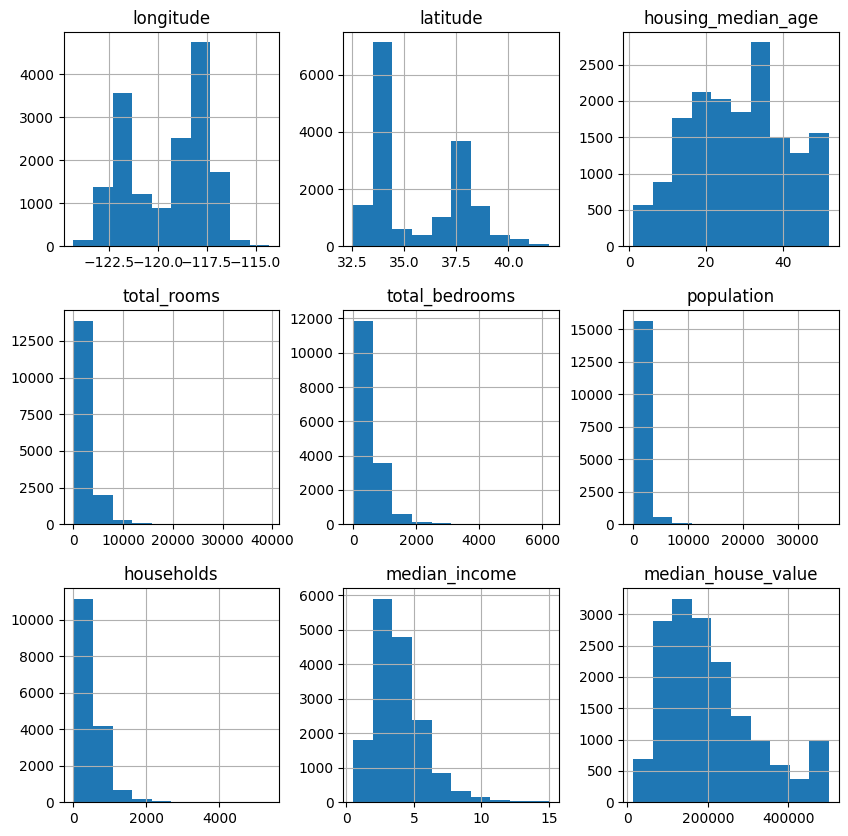

In [340]:
train_data.hist(figsize=(10,10))

In [341]:
train_data_corr = train_data.drop(['ocean_proximity'], axis=1 )

In [342]:
train_data_corr.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924775,-0.109447,0.043683,0.068371,0.099585,0.055647,-0.011240,-0.044369
latitude,-0.924775,1.000000,0.013009,-0.036109,-0.066871,-0.108756,-0.072007,-0.084153,-0.145109
housing_median_age,-0.109447,0.013009,1.000000,-0.359738,-0.323861,-0.296323,-0.305115,-0.110261,0.112458
total_rooms,0.043683,-0.036109,-0.359738,1.000000,0.930466,0.855569,0.918499,0.195763,0.131478
total_bedrooms,0.068371,-0.066871,-0.323861,0.930466,1.000000,0.879037,0.980239,-0.008947,0.046833
population,0.099585,-0.108756,-0.296323,0.855569,0.879037,1.000000,0.907453,0.002455,-0.027133
households,0.055647,-0.072007,-0.305115,0.918499,0.980239,0.907453,1.000000,0.012063,0.062326
median_income,-0.011240,-0.084153,-0.110261,0.195763,-0.008947,0.002455,0.012063,1.000000,0.692274
median_house_value,-0.044369,-0.145109,0.112458,0.131478,0.046833,-0.027133,0.062326,0.692274,1.000000


<Axes: >

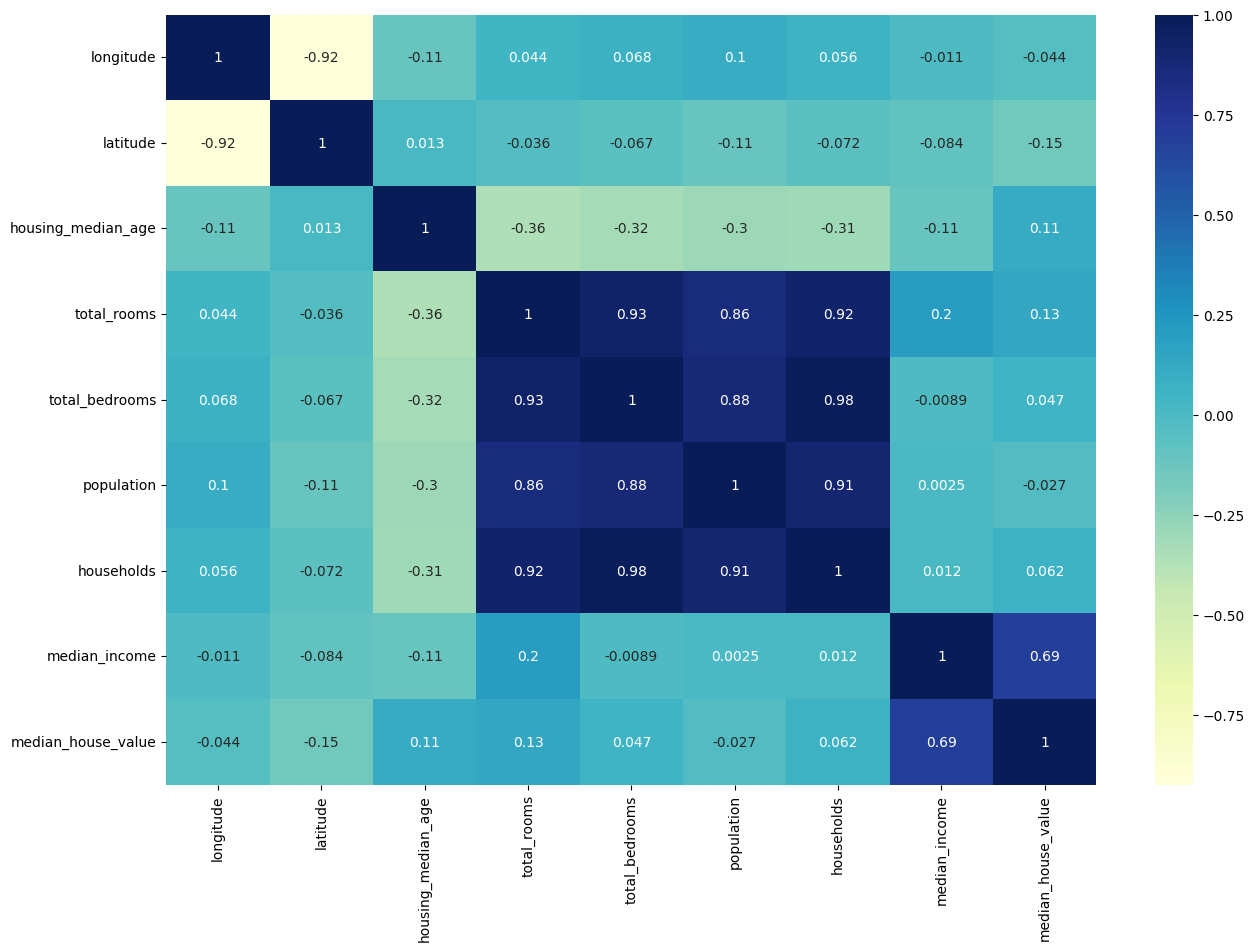

In [343]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(train_data_corr.corr(), annot=True, cmap="YlGnBu", ax=ax)

# Replacing 'ocean_proximity' String columns with numerical values 

In [344]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7201
INLAND        5238
NEAR OCEAN    2096
NEAR BAY      1806
ISLAND           5
Name: count, dtype: int64

In [345]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity).replace({True: 1, False: 0})).drop(['ocean_proximity'], axis=1)

In [346]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
15849,-122.44,37.74,52.0,2074.0,366.0,909.0,394.0,4.8382,294900.0,0,0,0,1,0
20570,-121.96,38.54,6.0,1485.0,318.0,894.0,308.0,3.2222,139600.0,0,1,0,0,0
18531,-122.02,36.98,35.0,1053.0,263.0,552.0,237.0,2.7125,217500.0,0,0,0,0,1
15264,-117.29,33.05,28.0,1146.0,338.0,672.0,292.0,3.1667,300000.0,0,0,0,0,1
3392,-118.31,34.28,34.0,3258.0,610.0,1810.0,633.0,5.1145,219900.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6793,-118.14,34.09,28.0,4164.0,1127.0,2934.0,1014.0,2.7483,218800.0,1,0,0,0,0
2000,-119.78,36.74,15.0,1461.0,415.0,924.0,356.0,2.5045,90300.0,0,1,0,0,0
10307,-117.82,33.90,25.0,1137.0,170.0,524.0,164.0,7.5744,259300.0,1,0,0,0,0
5442,-118.45,34.00,39.0,1909.0,359.0,867.0,345.0,4.7000,334700.0,1,0,0,0,0


# Corelation heatmap 

<Axes: >

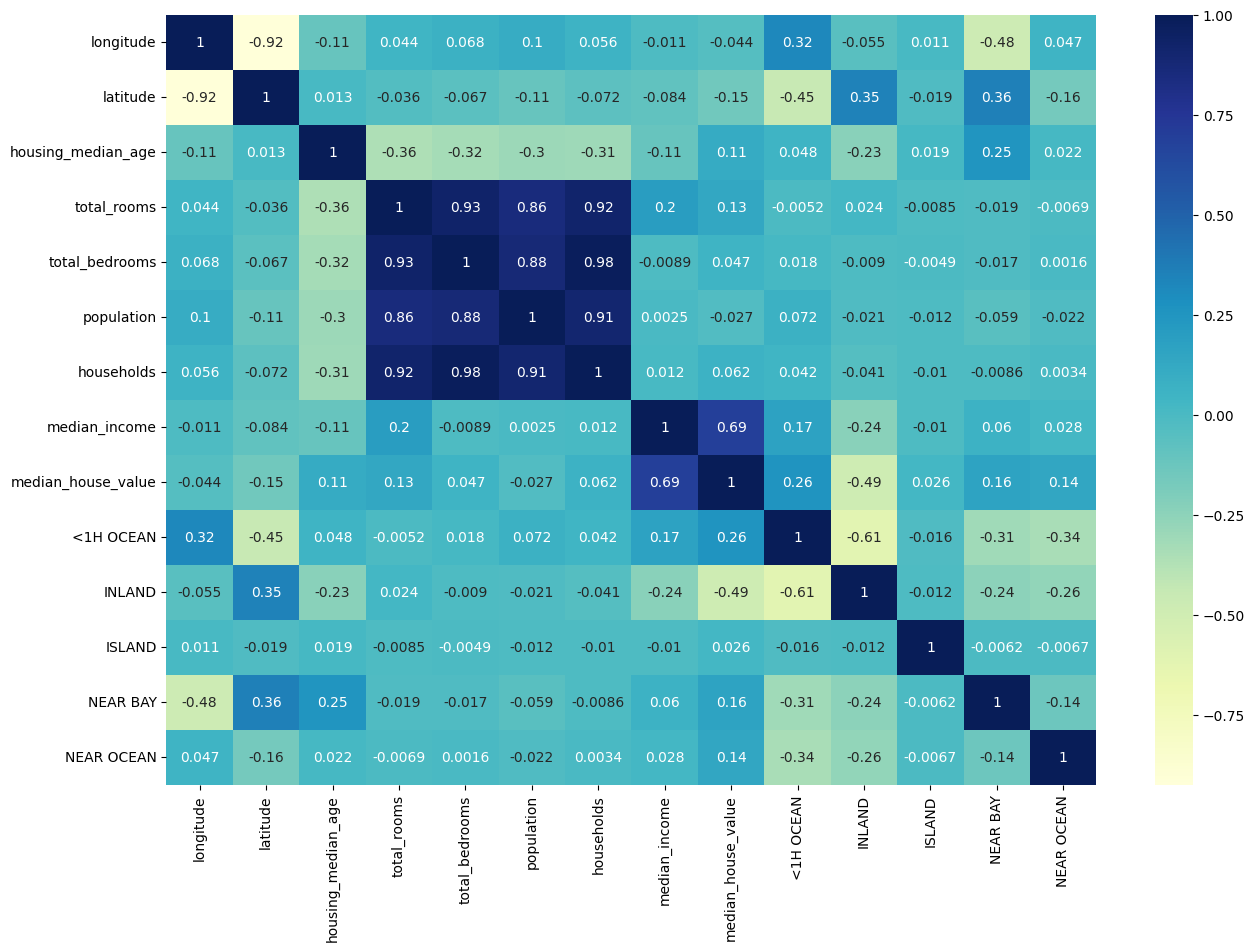

In [347]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu", ax=ax)

# log columns distribution

In [348]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >]],
      dtype=object)

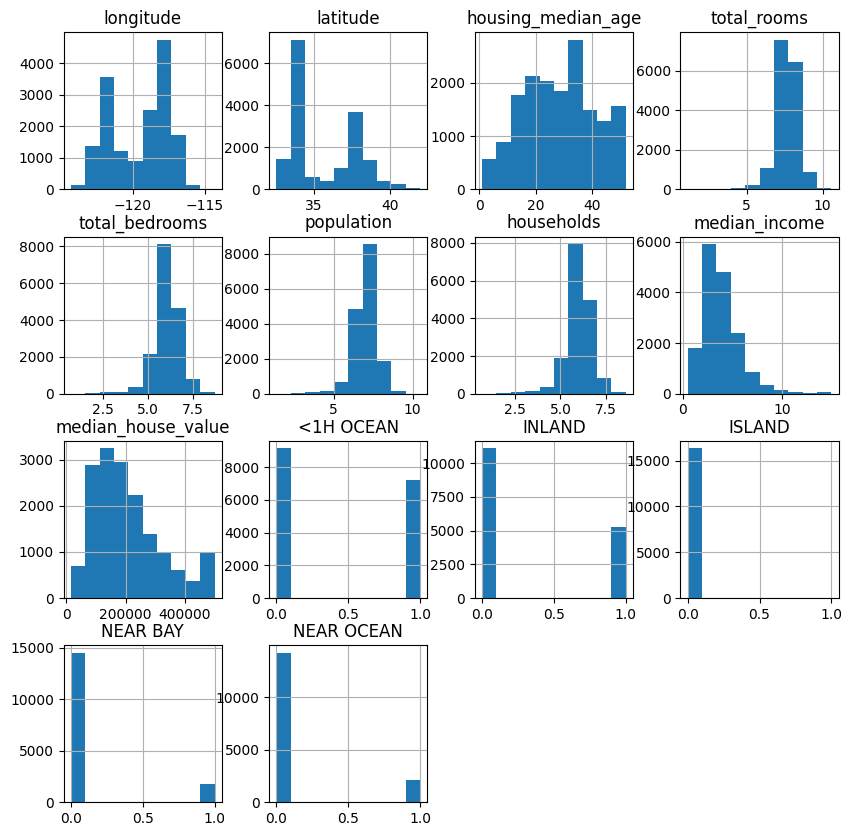

In [349]:
train_data.hist(figsize=(10,10))

# Plotting the data on a coordinate grid against the price.

<Axes: xlabel='latitude', ylabel='longitude'>

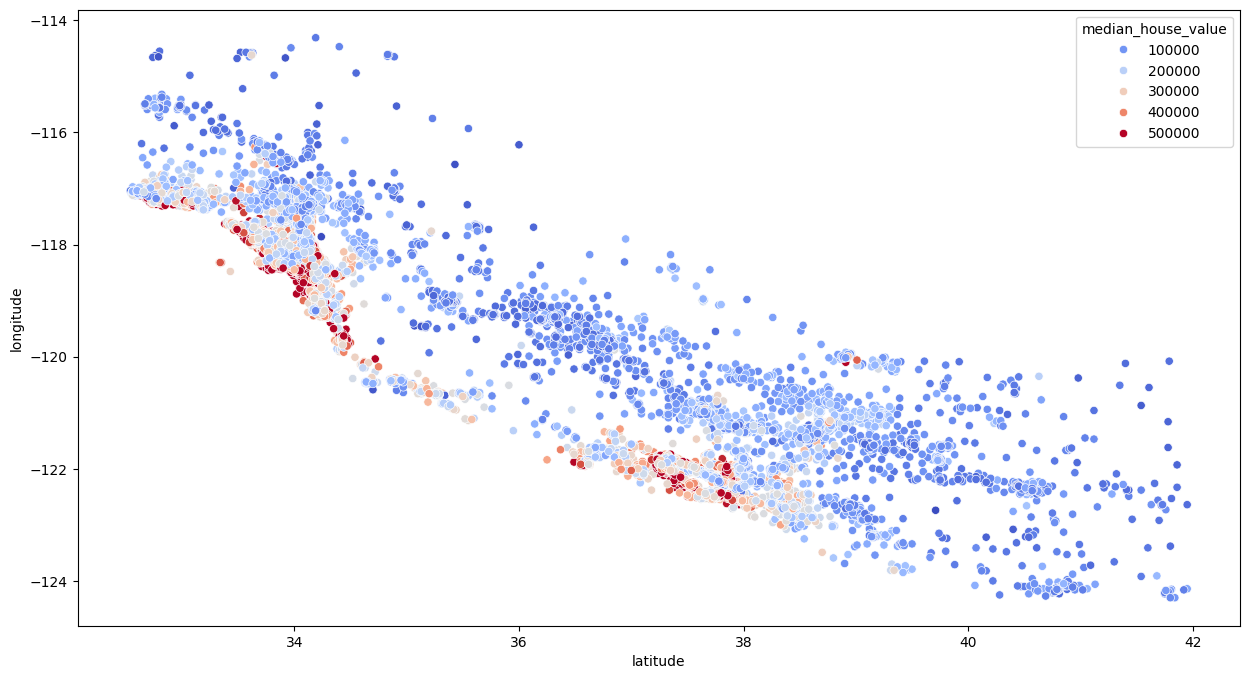

In [350]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

# Trying to create some additionals features, that have more corelations to the target value. In this case: Bedroom ratio and rooms in household

In [351]:
train_data['bedroom_percentage'] = train_data['total_bedrooms']/train_data['total_rooms']#
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<Axes: >

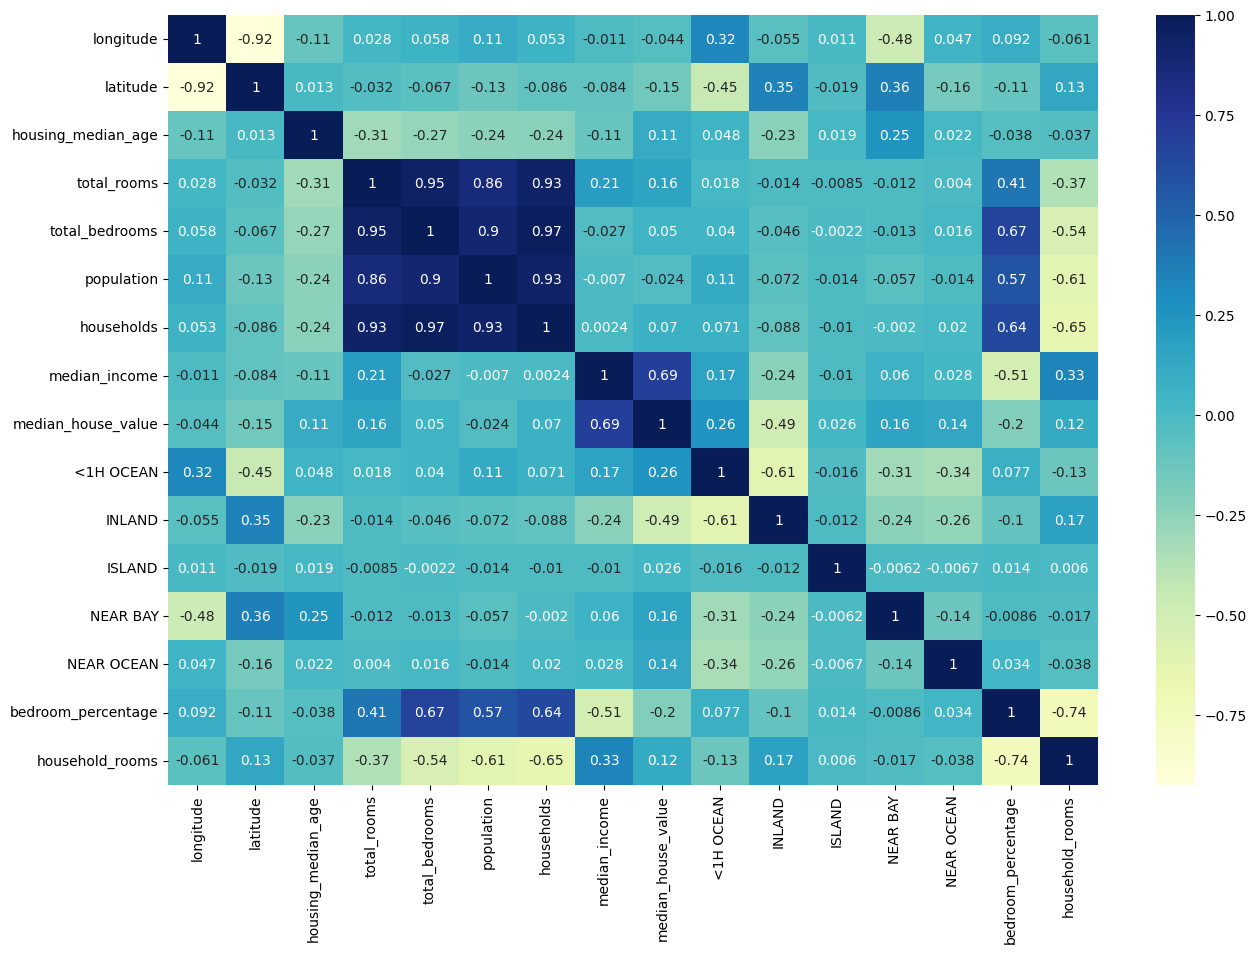

In [352]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu", ax=ax)

# Linear regression model

In [353]:
X_train, Y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(X_train, Y_train)

LinearRegression()

In [354]:
test_data = X_test.join(Y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity).replace({True: 1, False: 0})).drop(['ocean_proximity'], axis=1)

test_data['bedroom_percentage'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['houshold_rooms'] = test_data['total_rooms']/test_data['households']



In [355]:
X_test, Y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [356]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,bedroom_percentage,houshold_rooms
15335,-117.33,33.21,17.0,7.128496,5.707110,6.052089,5.666427,2.2882,85800.0,0,0,0,1,0.800605,1.258023
18661,-121.94,36.97,31.0,7.461066,6.047372,6.616065,5.874931,2.5172,330800.0,0,0,0,1,0.810524,1.269984
8070,-118.18,33.84,43.0,7.848543,6.300786,6.969791,6.287859,3.8350,418600.0,0,0,0,1,0.802797,1.248206
14402,-117.25,32.79,43.0,6.810142,5.484797,6.129050,5.327876,1.8365,328600.0,0,0,0,1,0.805387,1.278210
17765,-121.86,37.35,43.0,7.337588,5.918894,7.136483,5.880533,2.8000,153300.0,1,0,0,0,0.806654,1.247776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19639,-120.80,37.55,18.0,7.497207,5.817111,7.013016,5.799093,3.1641,96300.0,0,1,0,0,0.775904,1.292824
18617,-122.04,37.04,17.0,8.512783,6.902743,7.594884,6.854355,3.8854,312300.0,0,0,0,1,0.810868,1.241953
7599,-118.25,33.89,36.0,6.008813,4.276666,5.594711,4.356709,3.9000,115800.0,1,0,0,0,0.711732,1.379209
17552,-121.86,37.34,40.0,7.731053,6.232448,7.449498,6.075346,3.0089,185200.0,1,0,0,0,0.806158,1.272529


In [357]:
reg.score(X_test, Y_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- houshold_rooms
Feature names seen at fit time, yet now missing:
- ISLAND
- household_rooms


# The same linear regression model, but with scailing of data.

In [ ]:
X_train, Y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_scale, Y_train)

LinearRegression()

In [ ]:
X_test_scale = scaler.transform(X_test)

In [ ]:
reg.score(X_test_scale, Y_test)

0.6832318597175466

# Random Forest model

In [ ]:
forest  = RandomForestRegressor()
forest.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
forest.score(X_test, Y_test)

0.8252202457607664

# Random Forest with scale data

In [ ]:
forest  = RandomForestRegressor()
forest.fit(X_train_scale, Y_train)

RandomForestRegressor()

In [ ]:
forest.score(X_test_scale, Y_test)

0.8266711823690669